In [1]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\well_data_full.csv')
#data = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\well_data_full_2.csv')


print("Data Loaded OK")

Data Loaded OK


In [2]:
data.describe(include="all")

,DATE & TIME,CHOKE,WELL Name,Test,Well Head Pressure psig,Well Head Temp deg C,Sep. Static Pressure psig,Sep. Gas Temp deg C,Gas Spec. Gravity air=1,Gas Rate Sm3/d,...,Oil Flow Sm3/d,Water Flow Rate m3/d,WaterDensity Kg/m3,Flow Water Cut %,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,4027,4022,3981,4027,3600,3600,4027,4027,4025,4027.000000,...,4027.000000,4027.000000,780,4027,24.000000,24.000000,0.0,0.0,0.0,0.0
unique,3863,19,13,6,3199,2438,3115,2167,2,NaN,...,NaN,NaN,34,3638,NaN,NaN,NaN,NaN,NaN,NaN
top,13-Jul-20 7:00,40,LCA-3085,PAD-G2,-,-,0.00,0.00,-,NaN,...,NaN,NaN,1.07,0.000,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,1256,1106,2832,31,31,117,108,4001,NaN,...,NaN,NaN,327,79,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186489.649344,...,100.353077,59.485582,NaN,NaN,183.204167,41.448551,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92741.416933,...,60.409906,41.535302,NaN,NaN,1.060898,0.932432,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,NaN,NaN,181.710000,40.439592,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133901.135000,...,42.110000,20.660000,NaN,NaN,182.465000,40.731000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170655.880000,...,106.930000,53.600000,NaN,NaN,182.725000,40.994941,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246462.680000,...,148.330000,90.890000,NaN,NaN,183.830000,42.397935,NaN,NaN,NaN,NaN


In [3]:
# get the list of all the features in the dataset
print(data.columns.values)

['DATE & TIME' 'CHOKE' 'WELL Name' 'Test' 'Well Head Pressure  psig'
 'Well Head Temp deg C' 'Sep. Static Pressure psig' 'Sep. Gas Temp deg C'
 'Gas Spec. Gravity air=1' 'Gas Rate Sm3/d' 'Gas Cumm. Sm3'
 'GOR (Gas/Oil Ratio) m3/m3' 'Oil Density  g/cm3' 'Oil Temp deg C'
 ' Raw Oil Flow  m3/d' 'Oil Flow Sm3/d' 'Water Flow Rate m3/d'
 'WaterDensity Kg/m3' 'Flow Water Cut  %' 'Unnamed: 19' 'Unnamed: 20'
 'Unnamed: 21' 'Unnamed: 22' 'Unnamed: 23' 'Unnamed: 24']


<AxesSubplot:>

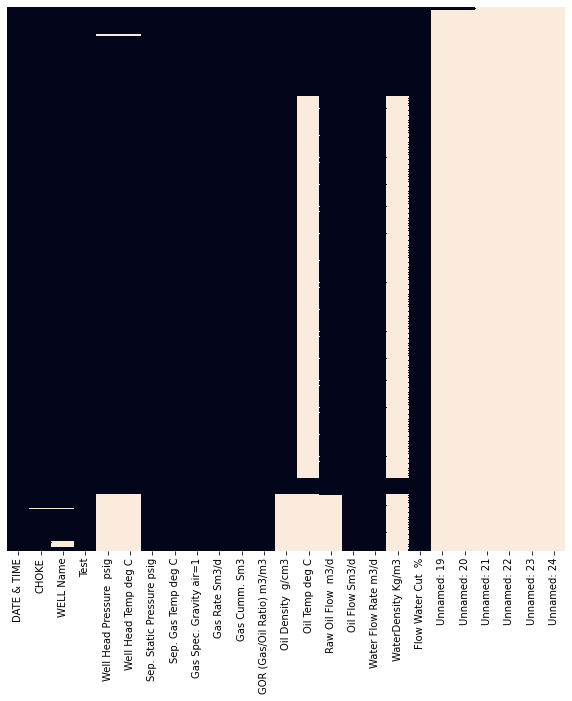

In [4]:
# Checking missing values in each variable
plt.figure(figsize=(10,10))
sn.heatmap(data.isnull(), yticklabels = False, cbar = False)

In [2]:
well = data[['DATE & TIME', 'CHOKE', 'WELL Name', 'Test', 'Well Head Pressure  psig',
       'Well Head Temp deg C', 'Sep. Static Pressure psig',
       'Sep. Gas Temp deg C', 'Gas Rate Sm3/d',
       'Gas Cumm. Sm3', 'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3',
       'Oil Temp deg C', ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d',
       'Water Flow Rate m3/d', 'WaterDensity Kg/m3', 'Flow Water Cut  %']]

well = well[well['CHOKE']!='-']

#for print
import matplotlib.pyplot as plt
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

def well_print(well):
    fig, ax = plt.subplots(3,figsize=(22,8),sharex=True)
    wellname = 'Well Name: ' + well['WELL Name'].iloc[1]
    fig.suptitle(wellname)

    well.plot(x='DATE & TIME', y='Gas Rate Sm3/d',color='orange',ax=ax[0])
    well.plot(x='DATE & TIME', y='Oil Flow Sm3/d',color='green',ax=ax[1])
    well.plot(x='DATE & TIME', y='Water Flow Rate m3/d',color='blue',ax=ax[2])

    ax[0].set(title="Gas Flow Rate")
    ax[1].set(title="Oil Flow Rate")
    ax[2].set(title="Water Flow Rate")
   
    plt.show()

In [35]:
#to avoid no flow moments

well = well[well['CHOKE']!='-']
well.dropna(subset=['Gas Rate Sm3/d', 'Oil Flow Sm3/d'], axis=0, inplace=True)
well.isnull().sum()

well['GOR'] = well['Gas Rate Sm3/d'] / well['Oil Flow Sm3/d']
well['WGR'] = well['Water Flow Rate m3/d'] / well['Gas Rate Sm3/d']
well['WLR'] = well['Water Flow Rate m3/d'] / (well['Oil Flow Sm3/d']+well['Water Flow Rate m3/d'])

well.dropna(subset=['GOR', 'WGR', 'WLR'], axis=0, inplace=True)
well.isnull().sum()

well = well[well['GOR']!=0]
well = well[well['GOR']<=10000000]

well[well['GOR'] == 0 ].count()

well.columns

Index(['DATE & TIME', 'CHOKE', 'WELL Name', 'Test', 'Well Head Pressure  psig',
       'Well Head Temp deg C', 'Sep. Static Pressure psig',
       'Sep. Gas Temp deg C', 'Gas Rate Sm3/d', 'Gas Cumm. Sm3',
       'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3', 'Oil Temp deg C',
       ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d', 'Water Flow Rate m3/d',
       'WaterDensity Kg/m3', 'Flow Water Cut  %', 'GOR', 'WGR', 'WLR'],
      dtype='object')

In [3]:
well2 = well.copy()

well2 = well2[well2['Sep. Static Pressure psig']!='-']

well2['Sep. Static Pressure psig'] = well2['Sep. Static Pressure psig'].astype(float)
well2['Sep. Gas Temp deg C'] = well2['Sep. Gas Temp deg C'].astype(float)
well2['Oil Temp deg C'] = well2['Oil Temp deg C'].astype(float)

well2['shrinkage'] = well2['Oil Flow Sm3/d'] / well2[' Raw Oil Flow  m3/d']

well2['GOR'] = well2['Gas Rate Sm3/d'] / well2['Oil Flow Sm3/d']
well2['GWR'] = well2['Gas Rate Sm3/d'] / well2['Water Flow Rate m3/d']
well2['WLR'] = well2['Water Flow Rate m3/d'] / (well2['Oil Flow Sm3/d']+well2['Water Flow Rate m3/d'])


well2['Fp'] = 1.01008 / (1.015596 + (well2['Sep. Static Pressure psig']/15.5038))
well2['Ft'] = (460+(well2['Sep. Gas Temp deg C']*(9/5)+32))/520
well2['Fz'] = 0.734285 / 0.99584

well2['Gas Rate Act m3/d'] = well2['Gas Rate Sm3/d'] * well2['Fp'] * well2['Ft'] * well2['Fz'] 
well2['Liq Rate Act m3/d'] = well2[' Raw Oil Flow  m3/d'] + well2['Water Flow Rate m3/d']

well2['GVF'] = well2['Gas Rate Act m3/d'] / (well2['Gas Rate Act m3/d'] + well2['Liq Rate Act m3/d'])
well2['GVF'].describe()

count    3536.000000
mean        0.868243
std         0.109597
min         0.000000
25%         0.850049
50%         0.868448
75%         0.904991
max         1.000000
Name: GVF, dtype: float64

In [1]:
sep_d = well.set_index('DATE & TIME')

sep_d.index = pd.to_datetime(sep_d.index)

sep_d['month'] = sep_d.index.month
sep_d['year'] = sep_d.index.year
sep_d['year_month'] = sep_d['year'].map(str) + '-' + sep_d['month'].map(str) 
sep_d = sep_d.sort_values('month')
#sep_d = sep_d.sort_values('year_month')


sep_d.groupby(['month','year'])['CHOKE', 'WELL Name', 'Test', 'Well Head Pressure  psig',
       'Well Head Temp deg C', 'Sep. Static Pressure psig',
       'Sep. Gas Temp deg C', 'Gas Rate Sm3/d', 'Gas Cumm. Sm3',
       'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3', 'Oil Temp deg C',
       ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d', 'Water Flow Rate m3/d',
       'WaterDensity Kg/m3', 'Flow Water Cut  %', 'GOR', 'WGR', 'WLR',
       'month'].mean()

wellname = sep_d['WELL Name'].unique() 
#uncomment to see the gor charts

for w in wellname:
    fig1 = plt.subplots(figsize=(24,6))
    #ax[0].set_title('GVF')
    #ax[1].set_title('WLR')
    #ax[2].set_title('GWR')
    sns.boxplot(y='GOR (Gas/Oil Ratio) m3/m3', x='year_month', data=sep_d[sep_d['WELL Name']==w], orient='v' ,showfliers = False)
    plt.title(w)
    #plt.show()
    plt.savefig(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\client_pvt_ref_data\gor_by_month\gor_by_month_'+w+'.png')
#plt.close()


NameError: name 'well' is not defined

In [4]:
#well3 = well.drop(well[(well['Test'] == 'PAD-G2') & (well['CHOKE'] != '40')].index)
#well = well.set_index('DATE & TIME')

#well.index = pd.to_datetime(well.index)



well3 = well.drop(well[(well['Test'] == 'PAD-G2') & (well['CHOKE'] != '40') & (well['DATE & TIME'] <= '2020-10-24 06:00:00')].index)
print(well.info(), well3.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 4026
Data columns (total 21 columns):
DATE & TIME                  3827 non-null object
CHOKE                        3826 non-null object
WELL Name                    3826 non-null object
Test                         3827 non-null object
Well Head Pressure  psig     3489 non-null object
Well Head Temp deg C         3489 non-null object
Sep. Static Pressure psig    3827 non-null object
Sep. Gas Temp deg C          3827 non-null object
Gas Rate Sm3/d               3827 non-null float64
Gas Cumm. Sm3                3827 non-null float64
GOR (Gas/Oil Ratio) m3/m3    3827 non-null float64
Oil Density  g/cm3           3501 non-null object
Oil Temp deg C               724 non-null object
 Raw Oil Flow  m3/d          3501 non-null float64
Oil Flow Sm3/d               3827 non-null float64
Water Flow Rate m3/d         3827 non-null float64
WaterDensity Kg/m3           724 non-null object
Flow Water Cut  %            3827 non-n

In [1]:
#well[well['Test']=='PAD-G2' & well['Test']=='PAD-G2']
well2 = well.drop(well[(well['Test'] == 'PAD-G2') & (well['CHOKE'] != '40')].index)

well2 = well.set_index('DATE & TIME')

well2.index = pd.to_datetime(well2.index)

well2 = well2['2020-10-24 06:00:00':'2020-11-24 18:00:00']

well2.reset_index(level=0, inplace=True)

#|CHOKE == "40"

#well2.query('Test == "PAD-G2"')[['Gas Rate Sm3/d', 'Oil Flow Sm3/d','Water Flow Rate m3/d']].mean()


well2 = well2[well2['Sep. Static Pressure psig']!='-']

well2['Sep. Static Pressure psig'] = well2['Sep. Static Pressure psig'].astype(float)
well2['Sep. Gas Temp deg C'] = well2['Sep. Gas Temp deg C'].astype(float)
well2['Oil Temp deg C'] = well2['Oil Temp deg C'].astype(float)

well2['shrinkage'] = well2['Oil Flow Sm3/d'] / well2[' Raw Oil Flow  m3/d']

well2['GOR'] = well2['Gas Rate Sm3/d'] / well2['Oil Flow Sm3/d']
well2['GWR'] = well2['Gas Rate Sm3/d'] / well2['Water Flow Rate m3/d']
well2['WLR'] = well2['Water Flow Rate m3/d'] / (well2['Oil Flow Sm3/d']+well2['Water Flow Rate m3/d'])


w = 'LCA-3005'

x1 = well2[well2['WELL Name']==w]

fig, ax = plt.subplots(3,figsize=(22,8),sharex=True)
wellname = 'Well Name: ' + x1['WELL Name'].iloc[1]
fig.suptitle(wellname)

x1.plot(x='DATE & TIME', y='GOR',color='orange',ax=ax[0])
x1.plot(x='DATE & TIME', y='GWR',color='green',ax=ax[1])
x1.plot(x='DATE & TIME', y='WLR',color='blue',ax=ax[2])
    
ax[0].set(title="GOR")
ax[1].set(title="GWR")
ax[2].set(title="WLR")
   
plt.show()


NameError: name 'well' is not defined

In [4]:
print(well['WELL Name'].unique())
print(well['Test'].unique())

['LCA-3010' 'LCA-3007' 'LCA-3008' 'LCA-3009' 'LCA-3011' 'LCA-3013'
 'LCA-3005' 'LCA-3006' 'LCA-3001' 'LCA-3012' 'LCA-3085' 'LCA-3084'
 'LCA-3083' nan]
['sep-movil-r3' 'sep-movil-r1' 'sep-movil-r2' 'sep-movil-r4' 'PAD-G2'
 'sep-movil-r5-fsf']


In [4]:

well['Meter'] = well['Test'].map(lambda x: 'MPFM' if x=='sep-movil-r5-fsf' else 'SEP')
well['Meter'].unique()

array(['SEP', 'MPFM'], dtype=object)

In [19]:
for t in well['Test']:
    j = well[['Test','WELL Name']]
    
j['Test'].unique()   
    
#well[well['Test']==t]['WELL Name'].unique()

array(['PAD-G2', 'sep-movil-r1', 'sep-movil-r2', 'sep-movil-r3',
       'sep-movil-r4', 'sep-movil-r5-fsf'], dtype=object)

In [20]:
well.groupby('Test')['WELL Name'].unique()

Test
PAD-G2                                 [LCA-3084, LCA-3085, LCA-3083]
sep-movil-r1                                               [LCA-3005]
sep-movil-r2        [LCA-3001, LCA-3008, LCA-3011, LCA-3007, LCA-3...
sep-movil-r3        [LCA-3010, LCA-3013, LCA-3005, LCA-3006, LCA-3...
sep-movil-r4        [LCA-3010, LCA-3009, LCA-3008, LCA-3007, LCA-3...
sep-movil-r5-fsf    [LCA-3011, LCA-3010, LCA-3012, LCA-3009, LCA-3...
Name: WELL Name, dtype: object

In [27]:
well2 = well.set_index('DATE & TIME')

well2.index = pd.to_datetime(well2.index)

well2['2019-01-07 11:00:00':'2021-01-07 11:00:00'].head()


,CHOKE,WELL Name,Test,Well Head Pressure psig,Well Head Temp deg C,Sep. Static Pressure psig,Sep. Gas Temp deg C,Gas Rate Sm3/d,Gas Cumm. Sm3,GOR (Gas/Oil Ratio) m3/m3,Oil Density g/cm3,Oil Temp deg C,Raw Oil Flow m3/d,Oil Flow Sm3/d,Water Flow Rate m3/d,WaterDensity Kg/m3,Flow Water Cut %
DATE & TIME,,,,,,,,,,,,,,,,,
2020-07-30 05:00:00,20,LCA-3084,PAD-G2,4885.3,53.36,1347.12,34.07,167243.07,9230094.18,1588.10,0.562,NaN,175.52,105.31,63.79,NaN,37.723
2020-08-03 18:00:00,20,LCA-3085,PAD-G2,4507.4,58.92,1338.70,40.48,164445.32,10072593.75,1368.78,0.546,NaN,200.23,120.14,38.16,NaN,24.106
2020-08-03 19:00:00,28,LCA-3083,PAD-G2,3813.0,63.09,1342.44,41.06,204749.65,10081124.99,1333.79,0.554,NaN,251.66,153.51,78.86,NaN,33.937
2020-08-03 20:00:00,28,LCA-3083,PAD-G2,3812.3,63.01,1343.69,41.58,245169.83,10091340.40,1566.58,0.554,NaN,256.56,156.50,83.61,NaN,34.822
2020-08-03 21:00:00,28,LCA-3083,PAD-G2,3813.1,63.29,1344.33,41.93,244879.03,10101543.69,1559.74,0.554,NaN,257.38,157.00,83.66,NaN,34.763


C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

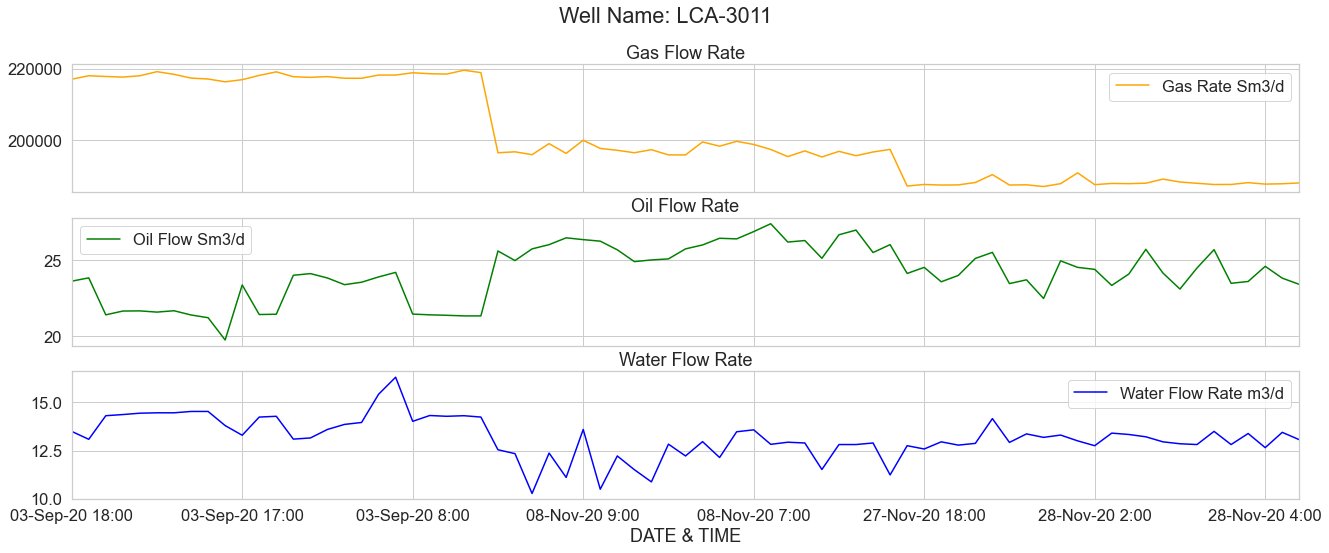

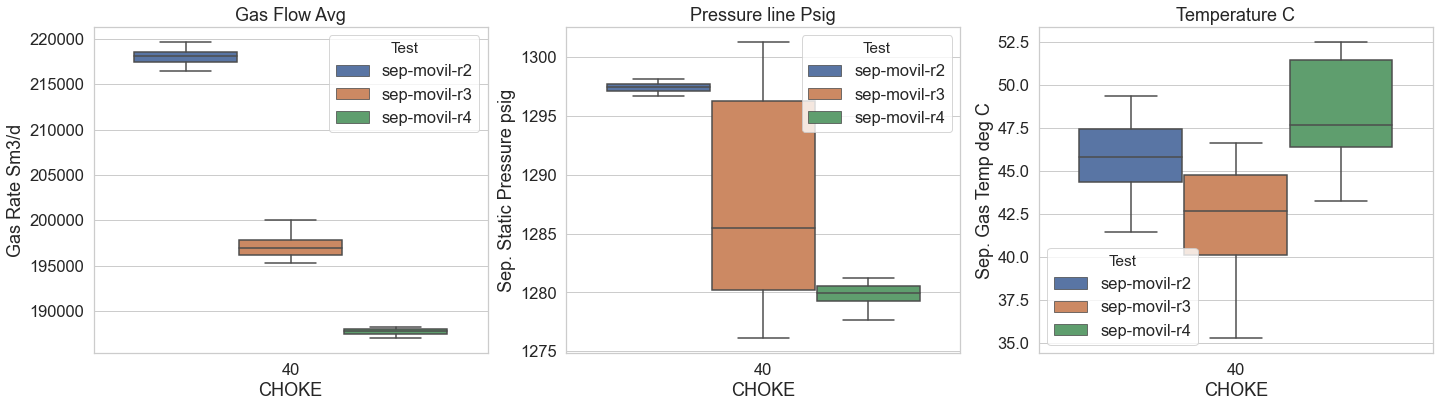

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

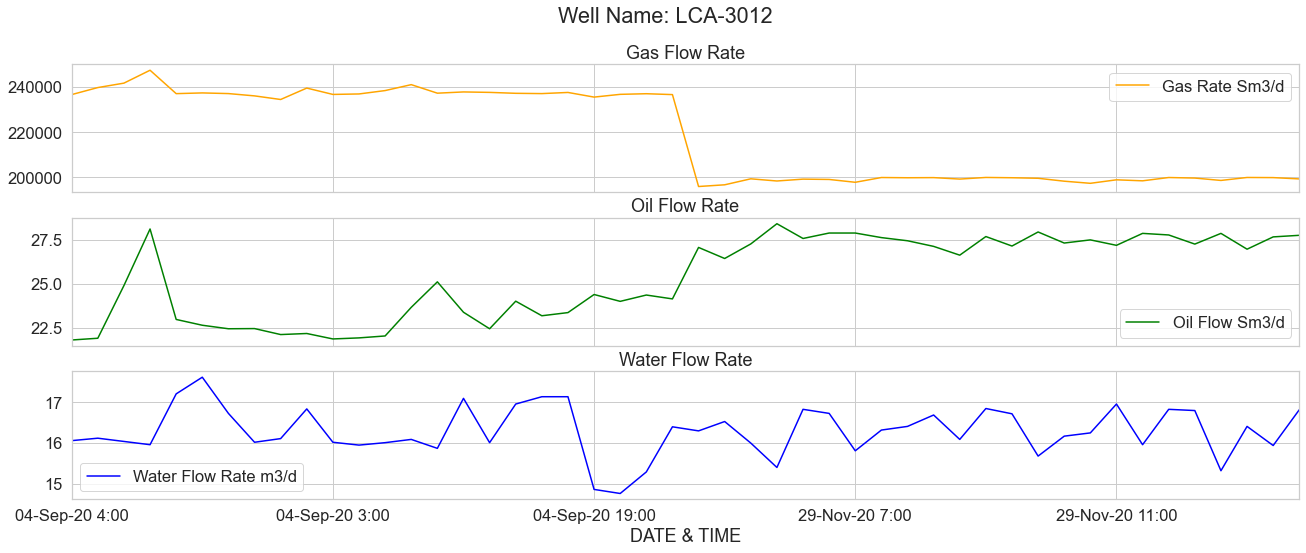

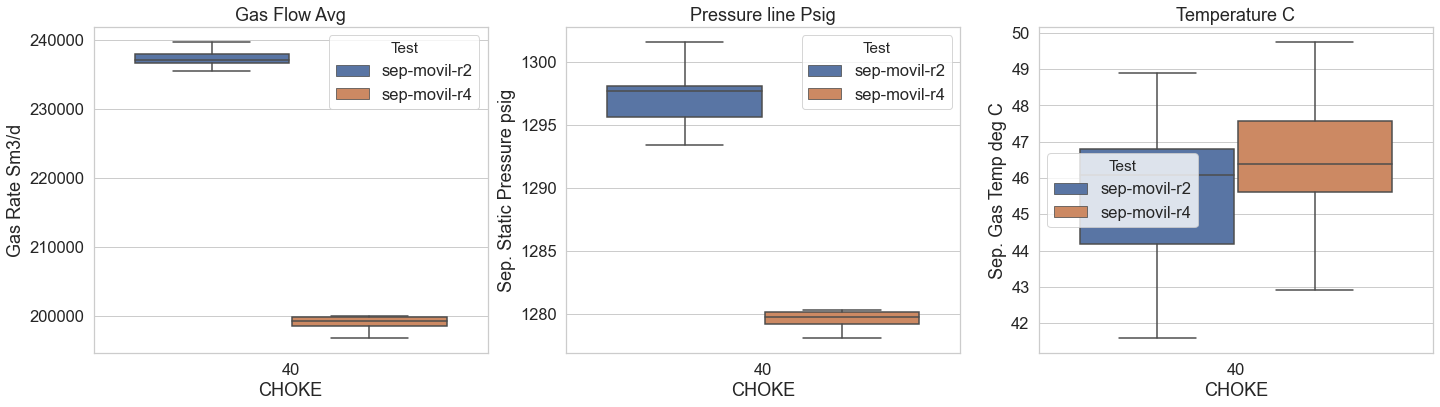

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

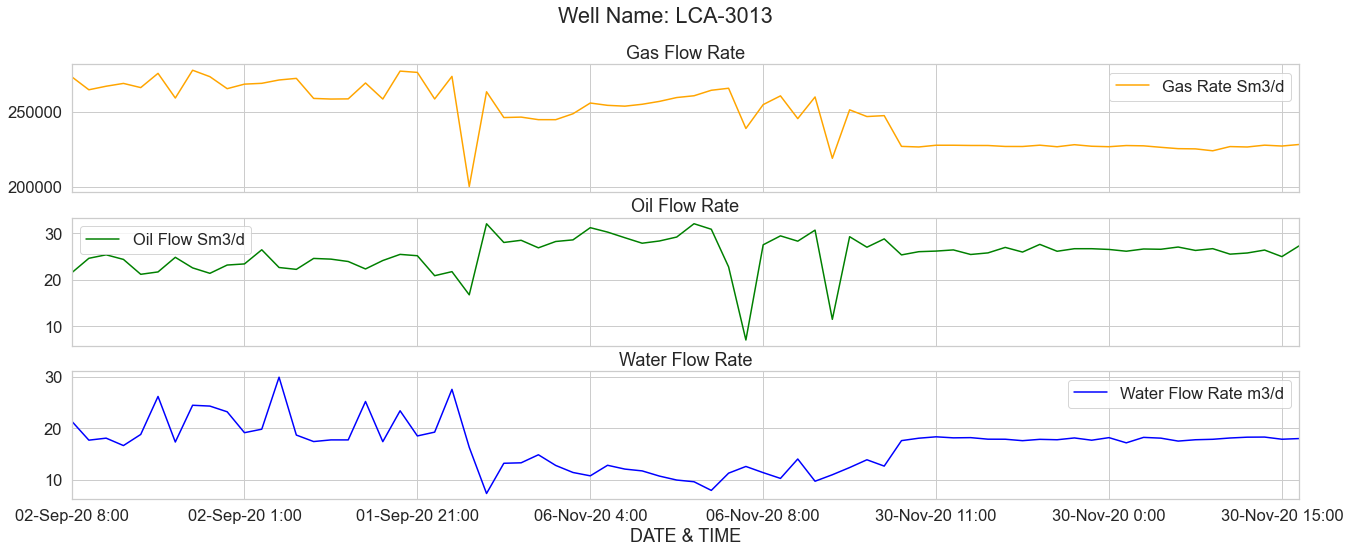

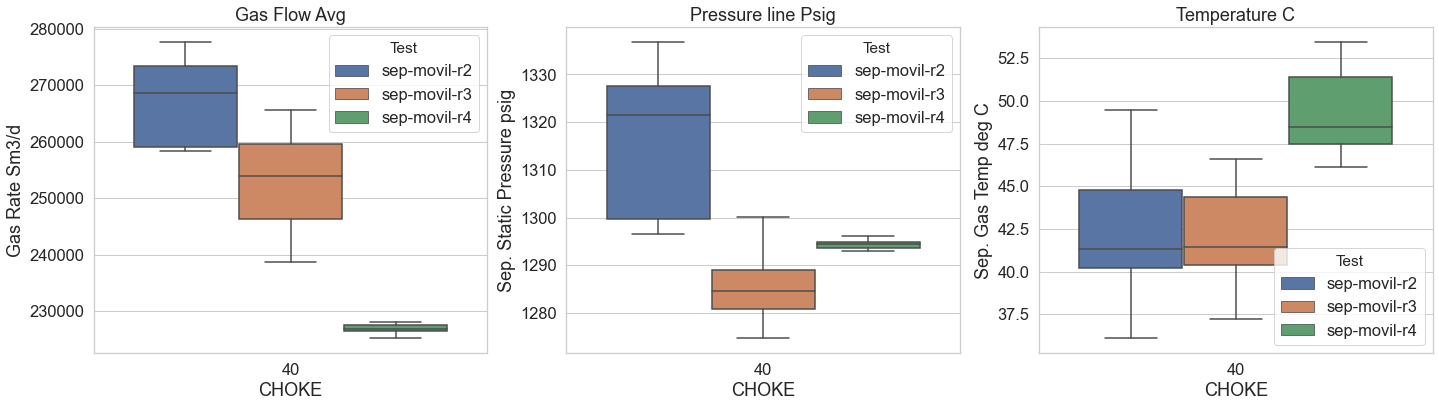

In [23]:
G2 = ['LCA-3083','LCA-3084','LCA-3085']
G7 = ['LCA-3005', 'LCA-3006', 'LCA-3007']
G8 = ['LCA-3008', 'LCA-3009', 'LCA-3010']
K3 = ['LCA-3011', 'LCA-3012', 'LCA-3013']
lc3001 = ['LCA-3001']

well = well[well['Test'] != 'sep-movil-r5-fsf']

well['Sep. Static Pressure psig'] = well['Sep. Static Pressure psig'].astype(float)
well['Sep. Gas Temp deg C'] = well['Sep. Gas Temp deg C'].astype(float)

wellname = K3

well.sort_values(by=['Test'],inplace=True)

for w in wellname:
    well_print(well[well['WELL Name']==w])
    fig1, ax = plt.subplots(1,3,figsize=(24,6))
    ax[0].set_title('Gas Flow Avg')
    ax[1].set_title('Oil Flow Avg')
    ax[2].set_title('Water Flow Avg')
    #ax[1].set_title('Pressure line Psig')
    #ax[2].set_title('Temperature C')
    
    sns.boxplot(y='Gas Rate Sm3/d', x='CHOKE', data=well[well['WELL Name']==w], hue='Test', orient='v' ,showfliers = False, ax=ax[0])
    sns.boxplot(y='Oil Flow Sm3/d', x='CHOKE', data=well[well['WELL Name']==w], hue='Test', orient='v' , showfliers = False,ax=ax[1])
    sns.boxplot(y='Water Flow Rate m3/d', x='CHOKE', data=well[well['WELL Name']==w], hue='Test',orient='v' , showfliers = False,ax=ax[2])

    #sns.boxplot(y='Sep. Static Pressure psig', x='CHOKE', data=well[well['WELL Name']==w], hue='Test',orient='v' , showfliers = False,ax=ax[1])
    #sns.boxplot(y='Sep. Gas Temp deg C', x='CHOKE', data=well[well['WELL Name']==w], hue='Test',orient='v' , showfliers = False,ax=ax[2])
    
    plt.show()
    #print(well[well['WELL Name']==w].describe())

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

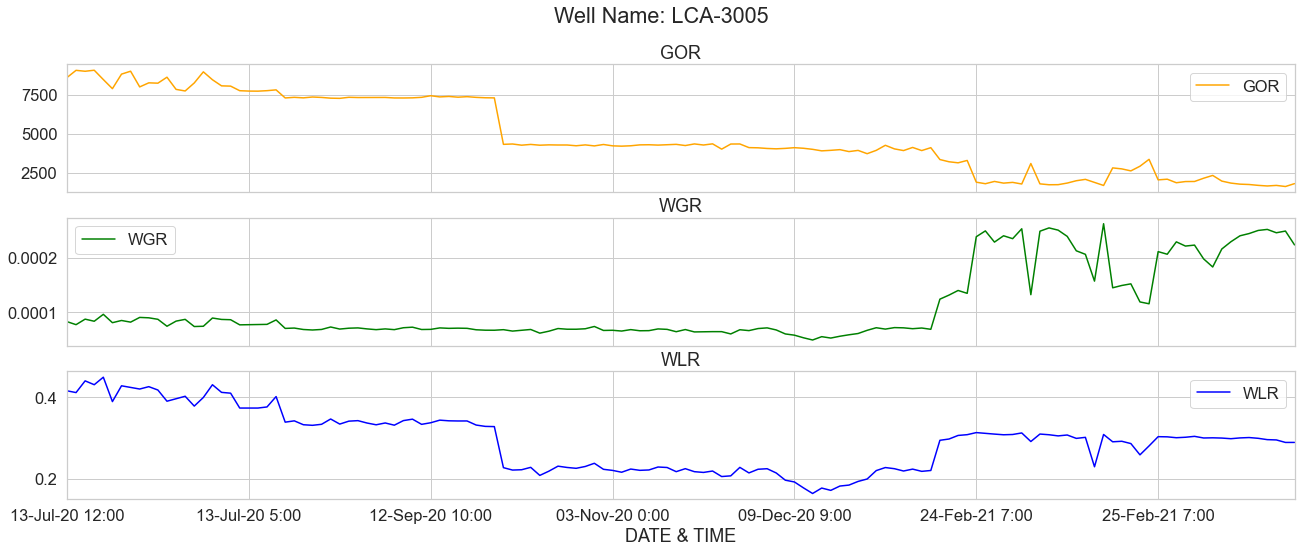

In [16]:
#well = well.set_index('DATE & TIME')

#well.index = pd.to_datetime(well.index)

#well = well['2020-10-01 11:00:00':'2021-01-07 11:00:00']

well = well[well['Sep. Static Pressure psig']!='-']

well['Sep. Static Pressure psig'] = well['Sep. Static Pressure psig'].astype(float)
well['Sep. Gas Temp deg C'] = well['Sep. Gas Temp deg C'].astype(float)
well['Oil Temp deg C'] = well['Oil Temp deg C'].astype(float)

well['shrinkage'] = well['Oil Flow Sm3/d'] / well[' Raw Oil Flow  m3/d']
well['GOR'] = well['Gas Rate Sm3/d'] / well['Oil Flow Sm3/d']
well['WGR'] = well['Water Flow Rate m3/d'] / well['Gas Rate Sm3/d']
well['WLR'] = well['Water Flow Rate m3/d'] / (well['Oil Flow Sm3/d']+well['Water Flow Rate m3/d'])


w = 'LCA-3005'

x1 = well[well['WELL Name']==w]

fig, ax = plt.subplots(3,figsize=(22,8),sharex=True)
wellname = 'Well Name: ' + x1['WELL Name'].iloc[1]
fig.suptitle(wellname)

x1.plot(x='DATE & TIME', y='GOR',color='orange',ax=ax[0])
x1.plot(x='DATE & TIME', y='WGR',color='green',ax=ax[1])
x1.plot(x='DATE & TIME', y='WLR',color='blue',ax=ax[2])
    
ax[0].set(title="GOR")
ax[1].set(title="WGR")
ax[2].set(title="WLR")
   
plt.show()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

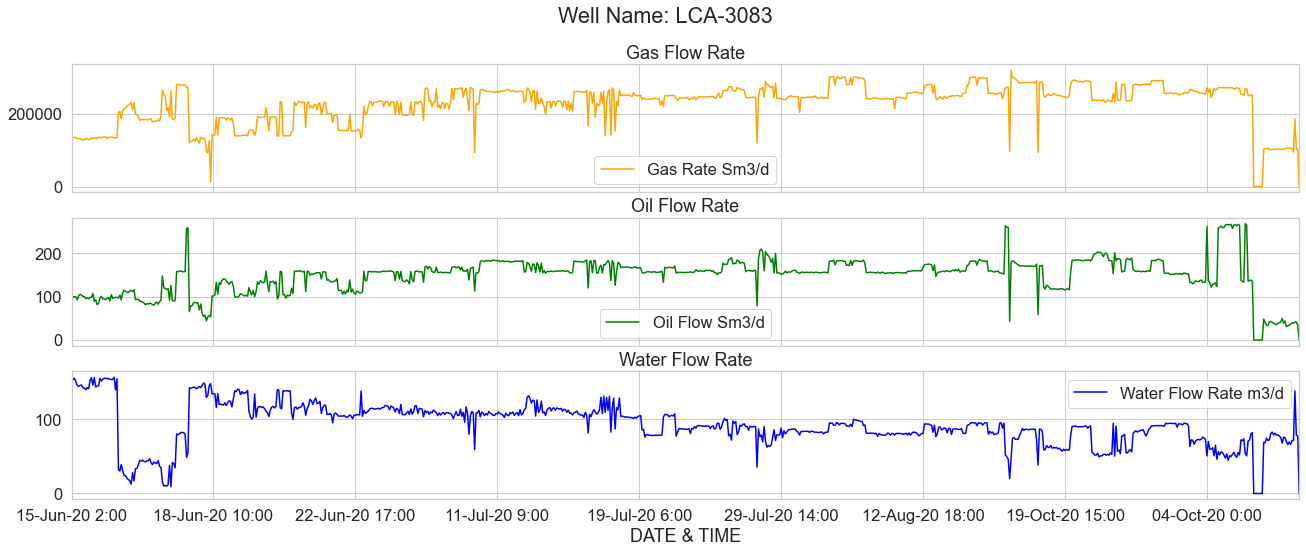

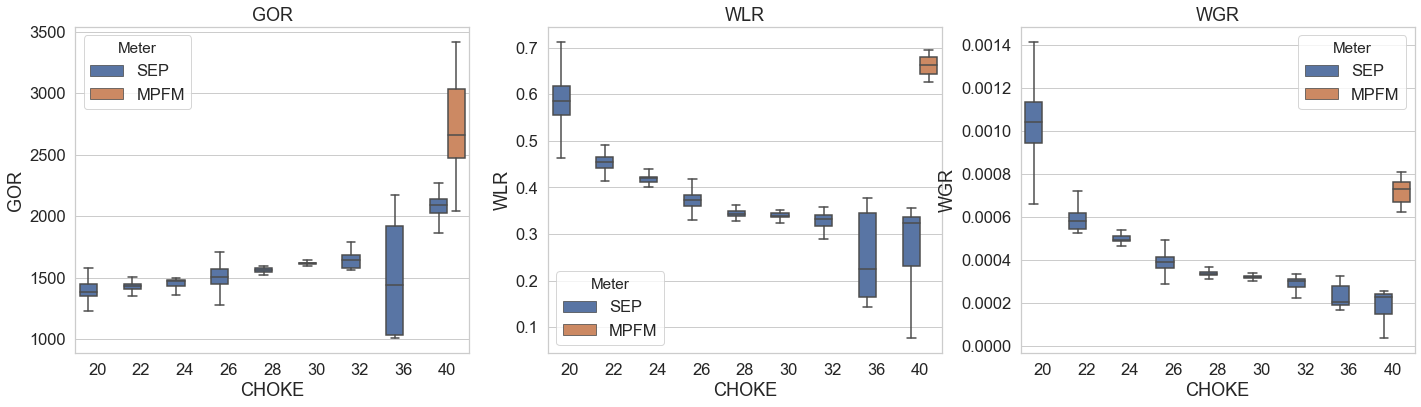

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

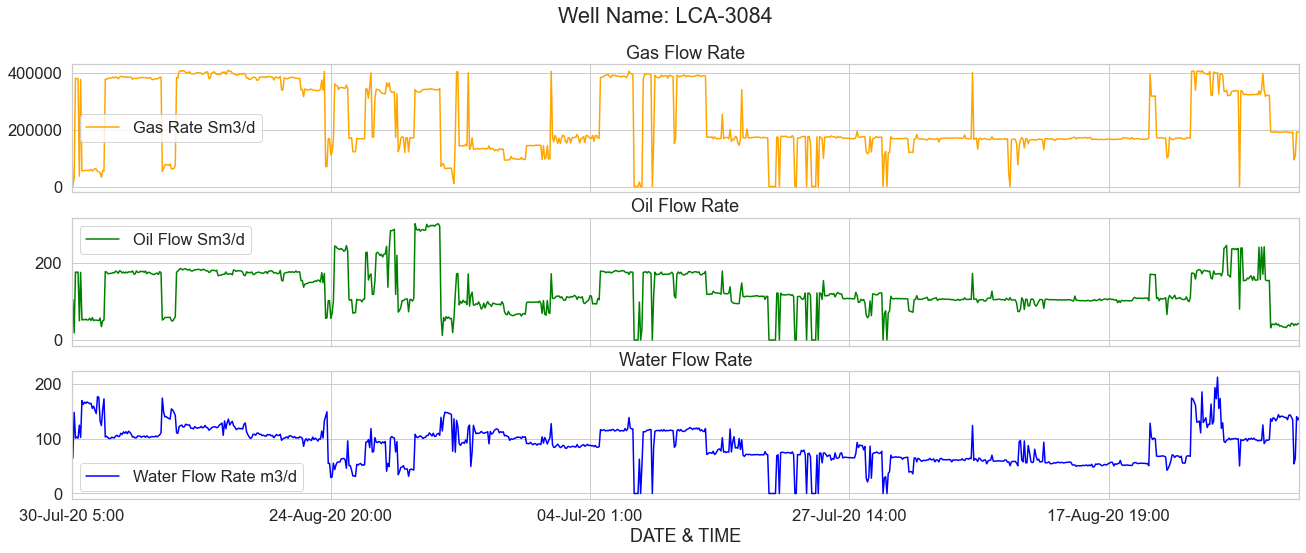

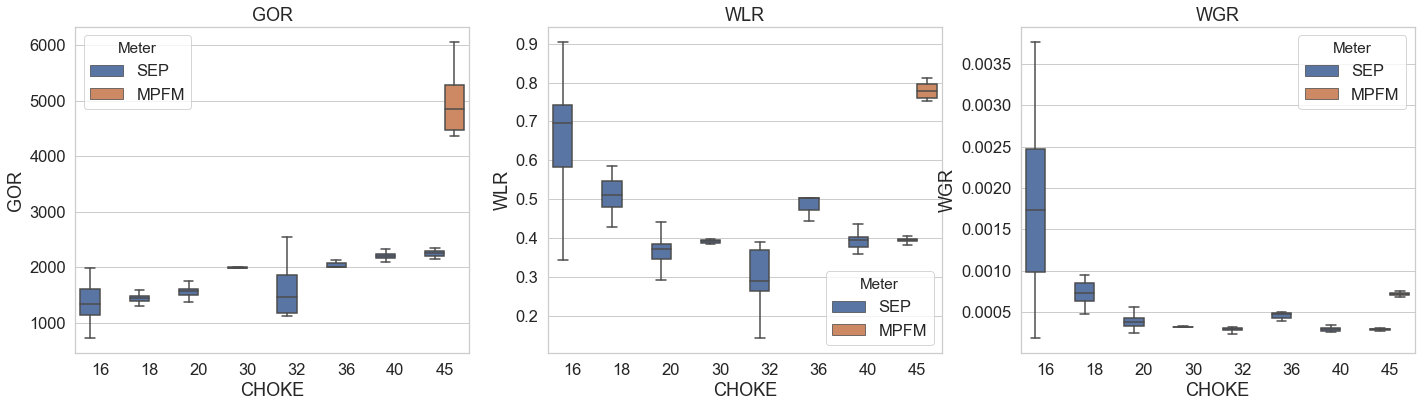

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

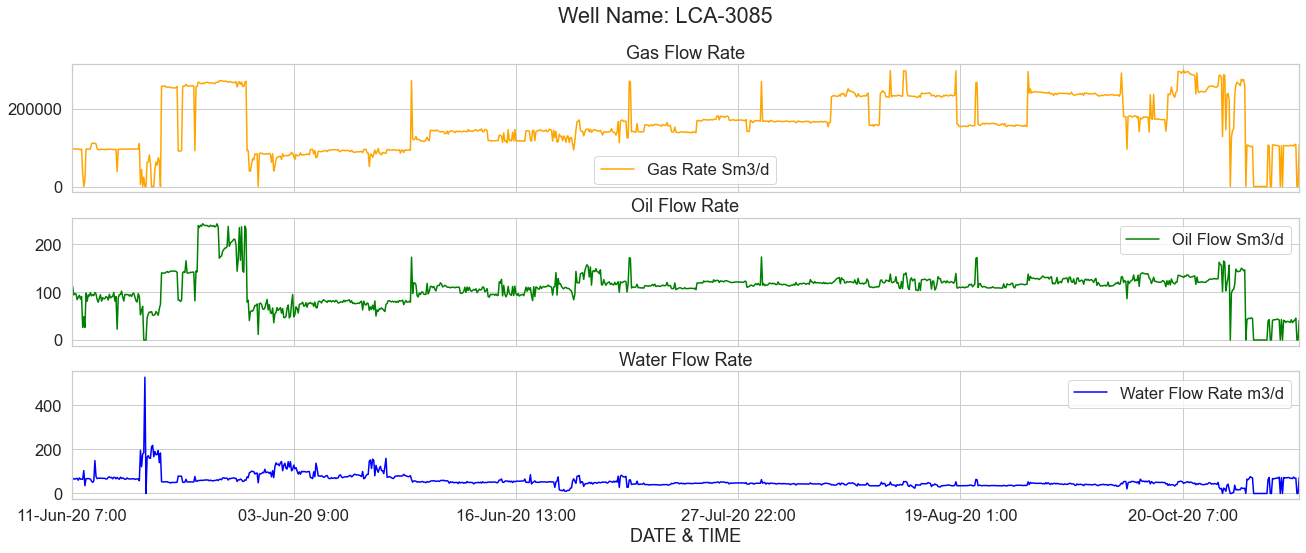

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


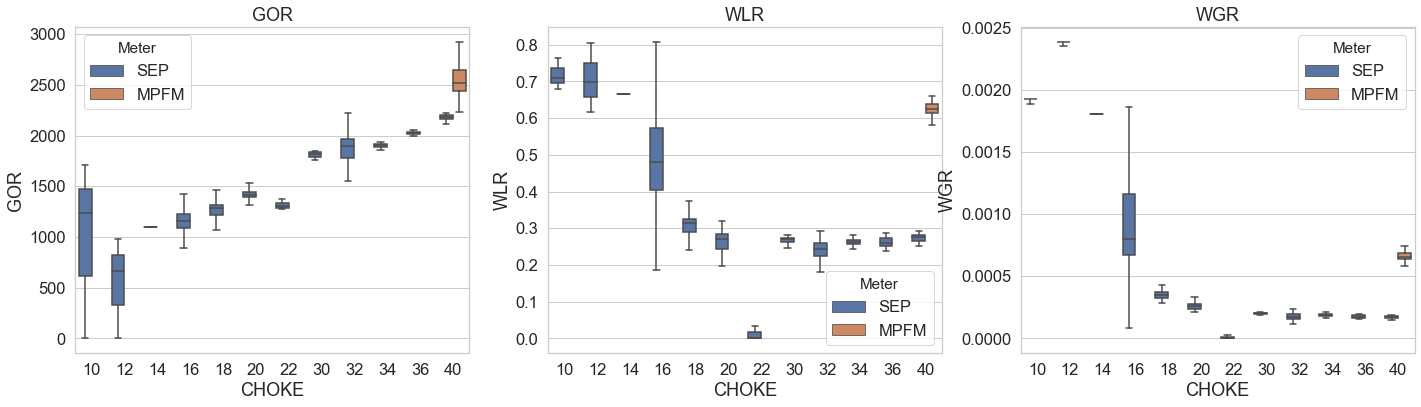

In [14]:
G2 = ['LCA-3083','LCA-3084','LCA-3085']
G7 = ['LCA-3005', 'LCA-3006', 'LCA-3007']
G8 = ['LCA-3008', 'LCA-3009', 'LCA-3010']
K3 = ['LCA-3011', 'LCA-3012', 'LCA-3013']
lc3001 = ['LCA-3001']

wellname = G2

well.sort_values(by=['Test'],inplace=True)

for w in wellname:
    well_print(well[well['WELL Name']==w])
    fig1, ax = plt.subplots(1,3,figsize=(24,6))
    ax[0].set_title('GOR')
    ax[1].set_title('WLR')
    ax[2].set_title('WGR')
    sns.boxplot(y='GOR', x='CHOKE', data=well[well['WELL Name']==w], hue='Test', orient='v' ,showfliers = False, ax=ax[0])
    sns.boxplot(y='WLR', x='CHOKE', data=well[well['WELL Name']==w], hue='Test', orient='v' , showfliers = False,ax=ax[1])
    sns.boxplot(y='WGR', x='CHOKE', data=well[well['WELL Name']==w], hue='Test',orient='v' , showfliers = False,ax=ax[2])
    plt.show()
    #print(well[well['WELL Name']==w].describe())

In [6]:
G2 = ['LCA-3083','LCA-3084','LCA-3085']
G7 = ['LCA-3005', 'LCA-3006', 'LCA-3007']
G8 = ['LCA-3008', 'LCA-3009', 'LCA-3010']
K3 = ['LCA-3011', 'LCA-3012', 'LCA-3013']
lc3001 = ['LCA-3001']

well['pad'] = well['WELL Name'].map(lambda x: 'G2' if x=='LCA-3083' or x=='LCA-3084' or x=='LCA-3085' else x)
well['pad'] = well['pad'].map(lambda x: 'G7' if x=='LCA-3005' or x=='LCA-3006' or x=='LCA-3007' else x)
well['pad'] = well['pad'].map(lambda x: 'G8' if x=='LCA-3008' or x=='LCA-3009' or x=='LCA-3010' else x)
well['pad'] = well['pad'].map(lambda x: 'K3' if x=='LCA-3011' or x=='LCA-3012' or x=='LCA-3013' else x)
well['pad'] = well['pad'].map(lambda x: '3001' if x=='LCA-3001' else x)

well['pad'].unique()


array(['G8', 'G7', 'K3', '3001', 'G2', nan], dtype=object)

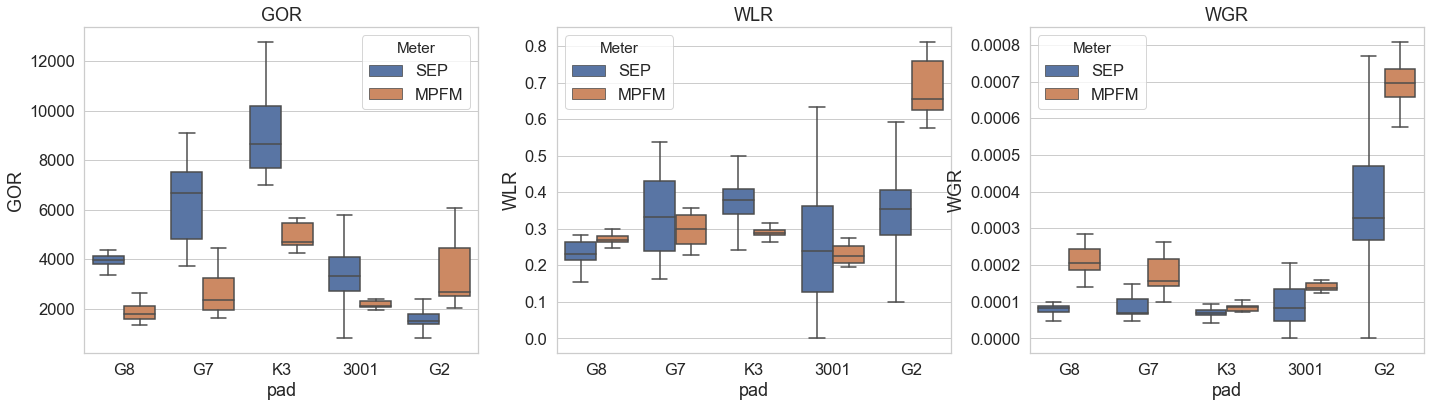

In [7]:


fig1, ax = plt.subplots(1,3,figsize=(24,6))
ax[0].set_title('GOR')
ax[1].set_title('WLR')
ax[2].set_title('WGR')
sns.boxplot(y='GOR', x='pad', data=well, hue='Meter', orient='v' ,showfliers = False, ax=ax[0])
sns.boxplot(y='WLR', x='pad', data=well, hue='Meter', orient='v' , showfliers = False,ax=ax[1])
sns.boxplot(y='WGR', x='pad', data=well, hue='Meter',orient='v' , showfliers = False,ax=ax[2])



plt.show()


In [13]:
well.columns

Index(['DATE & TIME', 'CHOKE', 'WELL Name', 'Test', 'Well Head Pressure  psig',
       'Well Head Temp deg C', 'Sep. Static Pressure psig',
       'Sep. Gas Temp deg C', 'Gas Rate Sm3/d', 'Gas Cumm. Sm3',
       'GOR (Gas/Oil Ratio) m3/m3', 'Oil Density  g/cm3', 'Oil Temp deg C',
       ' Raw Oil Flow  m3/d', 'Oil Flow Sm3/d', 'Water Flow Rate m3/d',
       'WaterDensity Kg/m3', 'Flow Water Cut  %', 'GOR', 'WGR', 'WLR', 'Meter',
       'pad'],
      dtype='object')

In [20]:

well.groupby(['pad','Meter'])['GOR'].describe()

d = well.groupby(['pad','Meter'])[['Gas Rate Sm3/d','Oil Flow Sm3/d','Water Flow Rate m3/d','GOR','WGR','WLR']].mean()
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)

j = d[d['Meter'] == 'MPFM']['GOR'].mean() / d[d['Meter'] == 'SEP']['GOR'].mean()
#d.corr()


d.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\Post_Process\groupby_lc.csv')
d

,Meter,pad,Gas Rate Sm3/d,Oil Flow Sm3/d,Water Flow Rate m3/d,GOR,WGR,WLR
0,MPFM,3001,43701.031538,20.296923,6.186154,2165.773348,0.000141,0.233324
1,SEP,3001,40332.730855,12.513333,5.065470,5188.434337,0.101195,0.271784
2,MPFM,G2,128990.542338,39.836364,90.330130,3290.848725,0.000695,0.679546
3,SEP,G2,211407.815942,132.459395,77.702665,1574.798704,0.000476,0.366478
4,MPFM,G7,124093.378764,48.944494,20.881685,2617.120277,0.000175,0.299924
5,SEP,G7,201741.364408,33.057714,18.424408,6258.695919,0.000086,0.340891
6,MPFM,G8,103163.299452,57.791507,21.649863,1827.128423,0.000212,0.273396
7,SEP,G8,157236.473669,40.430414,12.262189,3908.954928,0.000078,0.232777
8,MPFM,K3,146931.816027,29.936575,12.196986,4903.652454,0.000084,0.289494
9,SEP,K3,222950.769689,24.980052,15.283679,9141.216620,0.000069,0.378547
